# MA943 - Numerical Methods

## Question 1: Precision of floating point arithmetic

Consider the recursion relation

$a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1}$

with the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

1. Calculate the first 80 terms in this sequence using single precision floating point arithmetic (Float32 in Julia). Plot the resulting sequence on a lin-log plot.

2. Repeat the calculation using double precision floating point arithmetic (Float64 in Julia) and add the results to to your plot.

3. Find the **general** solution of the recursion relation analytically (it should contain two arbitrary constants). Hint: start from the ansatz $a_n = x^n$ and find the the allowed values of $x$.

4. Find the solution that satisfies the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

5. Find the solution that satisfies the perturbed initial conditions $a_1=1$ and $a_2=\frac{2}{3}+\epsilon$. Use the answer to explain your numerical results.

6. Julia supports arbitrary precision floating point arithmetic using the BigFloat type (see https://docs.julialang.org/en/latest/manual/integers-and-floating-point-numbers/#Arbitrary-Precision-Arithmetic-1). Try to reproduce the exact solution for the first 80 terms in the sequence using 128 bit precision and show the results on your plot.

__1.__

In [32]:
using Plots
Plots.pyplot()
function MyRecursion(a)
a[1]=1;a[2]=2/3
for n=2:79
    a[n+1]=2*a[n]-(8/9)*a[n-1]
end
    return a
end


MyRecursion (generic function with 1 method)


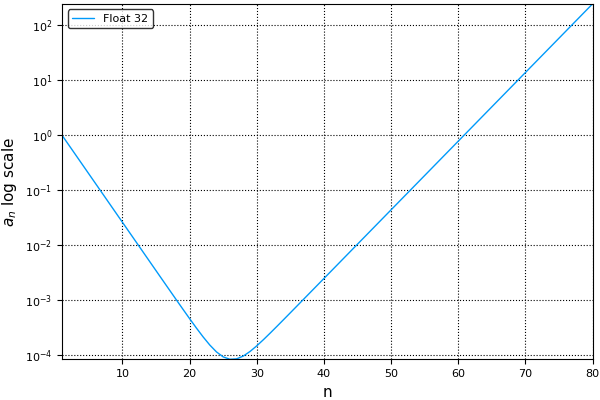

In [45]:
float_32=zeros(Float32,80);float_64=zeros(Float64,80)
float_32,float_64= MyRecursion(float_32),MyRecursion(float_64)
using LaTeXStrings

plot(collect(1:80),float_32, yscale=:log10,label="Float 32",xlabel="n",ylabel=L"$a_n $ log scale")

__2.__


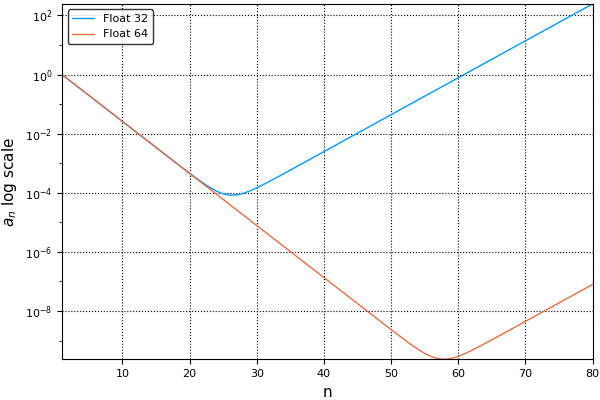

In [44]:
plot!(collect(1:80),float_64,yscale=:log10,label="Float 64")

__3.__

We have the recursion relation $$a_{n+1} = 2a_n - \frac{8}{9}a_{n-1}$$
We use the ansatz $$a_n = x^n$$
Then we get
$$x^{n+1} = 2x^n - \frac{8}{9}x^{n-1}$$
Rearranging
$$x^{n+1} - 2x^n + \frac{8}{9}x^{n-1} = 0$$

$$x^{n-1}\big( x^2 - 2x + \frac{8}{9}\big) = 0$$
So we have 
$$x=\frac{4}{3}\:,\: \frac{2}{3} $$
Now we have the general solution 
$$a_n = A\bigg(\frac{4}{3}\bigg)^n + B\bigg(\frac{2}{3}\bigg)^n $$
where A and B are constants.

__4.__
Using the initial conditions $$a_1 = 1 \quad \textrm{and}\quad  a_2 = \frac{2}{3}$$
\begin{align*}
a_1 = 1 = A\bigg(\frac{4}{3}\bigg) + B\bigg(\frac{2}{3}\bigg) \quad \implies \quad 3 = 4A + 2B 
\end{align*}
and
\begin{align*}
a_2 = \frac{2}{3} = A\bigg(\frac{4}{3}\bigg)^2 + B\bigg(\frac{2}{3}\bigg)^2 \quad \implies \quad 3 = 8A + 2B
\end{align*}
So $$A = 0 \quad \textrm{and} \quad B = \frac{3}{2} $$
So the solution is 
$$a_n = \frac{3}{2}\bigg(\frac{2}{3}\bigg)^n $$


__5.__
The perturbed inital conditions
$$a_1 = 1 \quad \textrm{and} \quad a_2 = \frac{2}{3} + \epsilon $$
gives solution 
$$a_n = \frac{9\epsilon}{8}\bigg(\frac{4}{3}\bigg)^n + \bigg(\frac{3}{2}-\frac{9\epsilon}{4}\bigg)\bigg(\frac{2}{3}\bigg)^n $$

If we introduce error in calculation we get the $\frac{4}{3}$ term contributing and so our $a_n$ diverges from the true solution and becomes a lot larger as n grows.

__6.__

In [34]:
function MybigfloatRecursion(a)
a[1]=BigFloat(1);a[2]=BigFloat(2)/BigFloat(3)
for n=2:79
    a[n+1]=BigFloat(2)*BigFloat(a[n])-(BigFloat(8)/BigFloat(9))*BigFloat(a[n-1])
end
    return a
end


MybigfloatRecursion (generic function with 1 method)


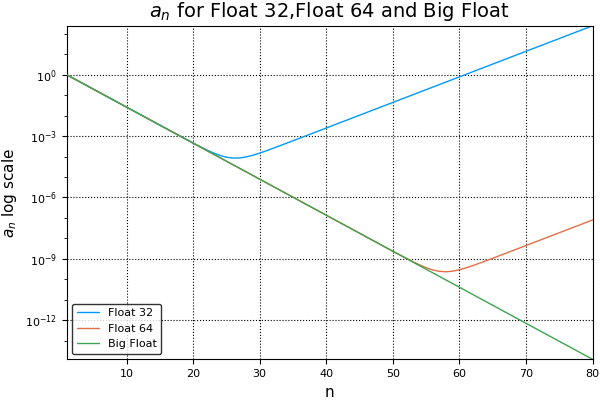

In [35]:
abig=zeros(BigFloat,80);
big_float=MybigfloatRecursion(abig);
using LaTeXStrings

plot!(collect(1:80),big_float,yscale=:log10, label="Big Float")
title!(L"$a_n$ for Float 32,Float 64 and Big Float")

## Question 2: Computational complexity of the mergesort algorithm

Consider two arrays of integers, A and B, having lengths n and m respectively. Assuming that the elements of A and B are already sorted in ascending order. The following recursive function merges them to return an array of length n+m whose elements are sorted in ascending order:



In [36]:
function mergepresorted(A::Array{Int64,1}, B::Array{Int64,1})
    if length(A) == 0
        return B
    elseif length(B) == 0
        return A
    elseif A[1] < B[1]
        return vcat([A[1]], mergepresorted(A[2:end], B))
    else
        return vcat([B[1]], mergepresorted(A, B[2:end]))
    end    
end

mergepresorted (generic function with 1 method)

The computational complexity of this function is $n+m$.

1. Verify that the function mergepresorted(A, B) works as described.
2. Write a recursive function that implements the mergesort algorithm for an array of integers whose length, $n$ is a power of 2: $n=2^m$. Verify that it works by generating some arrays of random integers and using your function to sort them.
3. Explain why the computational complexity, $F(n)$, of your mergesort algorithm satisfies the recursion
> $F(n) = 2\, F(\frac{n}{2}) + n\ \ \ \ $ with initial condition $F(1)=1$.  
4. Introduce the new variable p defined by $n = 2^p$ and let $b_p = F(2^p)$. Show that in these variables the above equation takes the form
> $b_p = 2 b_{p−1} + 2^p\ \ \ \ $ with initial condition $b_0 = 1$.
5. Find the general solution to the associated homogeneous recursion relation (ie without the $2^p$ term).
6. Find a particular solution of the original inhomogenous recursion relation and use the initial condition to determine the constant in the homogenous solution.
7. Hence show that the computational complexity of the mergesort algorithm is
> $F(n) = O(n\, \log n)$.
8. Use Julia's @timed macro to measure the execution time of your mergesort function for arrays of lengths $\{2^i : i =1 : 15\}$. Compare the results to the theoretical expectations.

__1.__

In [37]:
A=collect(23:98)
B=collect(34:102);

In [38]:
mergepresorted(A,B);

__2.__

In [39]:
function mergesort(A::Array{Int64,1})
    n=length(A)
    if (n==1)
        return A
    else
        m=Int64(n/2)
        return mergepresorted(mergesort(A[1:m]),mergesort(A[m+1:n])) #recursive line
    end
end

mergesort (generic function with 1 method)

In [40]:
C=rand(1:1000,32);

In [41]:
mergesort(C);

__3.__
We first notice that if the input is a single number the cost of sorting it is 1, just outputting the number. Giving us the initial condition $F(1)=1$. 
We see that mergesort is called twice within the function with it acting on an array of size $\frac{n}{2}$ both times. This gives us a computational complexity of $2F(\frac{n}{2})$. These sorted arrays are then merged using mergepresorted which has computational complexity corresponding to the length of the outputed array, in this case n. 
Hence we get $$F(n) = 2F\big(\frac{n}{2}\big) + n \quad \textrm{with inital condition} \quad F(1)=1$$

__4.__
Let $n=2^p$ and $b_p=F(2^p)$
Then 
$$F\bigg(\frac{n}{2}\bigg)=F\bigg(\frac{2^p}{2}\bigg)=b_{p-1}$$
So 
$$b_p = 2b_{p-1} + 2^p \quad \textrm{and} \quad F(1)=b_0=1 $$

__5.__
We use ansatz $b_p=x^p$ .
Then we get
$$x^{n} = 2x^{n-1} $$
Rearranging
$$x^{n} - 2x^{n-1} = 0 \quad \implies x=2 $$ 
The general solution to the homogeneous recursion relation
$$b_p=C\,2^p \quad \textrm{where C is a constant}$$

__6.__
We use particular solution $b_p=(A+Bp)2^p$

$$ \big(A+B\,p\big)2^p = 2\big(A+B\,(p-1)\big)2^{p-1} + 2^p = \big(A-B+1\big)2^p + B\,p\,2^p $$

Matching coefficients we get that $\: B=1 \: $ and using the initial condition 
$$b_0 = 02^0 + C\,2^0 \: \implies \: C = 1 $$

So we have 
$$b_p= p\,2^p + 2^p$$







__7.__
$$ n=2^p \implies p=\frac{log\,n}{log\,2}$$
So 
$$ F(n) = \frac{log\,n}{log\,2}\,2^{\frac{log\,n}{log\,2}} +2^{\frac{log\,n}{log\,2}} $$
$$= \frac{log\,n}{log\,2}\, n+ \bigg(n^{log\,2}\bigg)^{\frac{1}{log\,2}}
=\frac{n\,log\,n}{log\,2} + n$$

So $F(n)=\mathcal{O}\big(n\,log\,n\big)$

__8.__

In [42]:
mergetime,n=ones(15),ones(15)
for i=1:15
    ~, t, ~, ~, ~ = @timed mergesort(rand(1:1000,2^i))
    mergetime[i]=t
    n[i]=2^i
end
nlog=n.*log.(n)*mergetime[1];


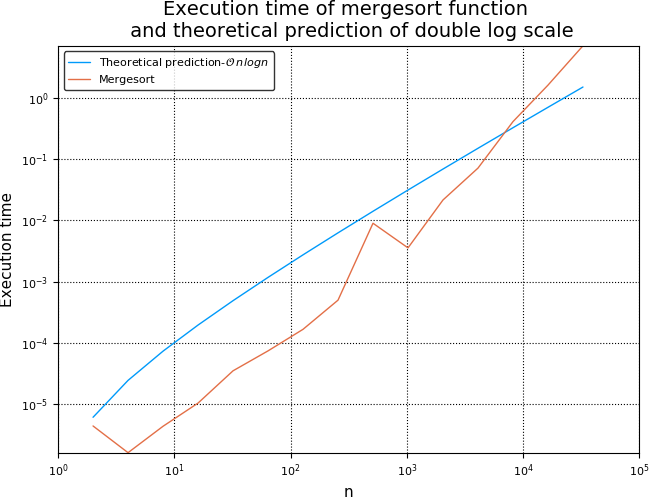

In [46]:
plot(n,nlog,label=L"Theoretical prediction-$\mathcal{O}\,n\,logn$",xlabel="n",ylabel="Execution time",yscale=:log10,xscale=:log10)
plot!(n,mergetime,label="Mergesort")
title!("Execution time of mergesort function \n and theoretical prediction of double log scale")
plot!(size=(650,500))

The prediction and our implementation of mergesort have the similar gradients for low values of n but our mergesort function execution time seems to grow more for very large n. 